In [19]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


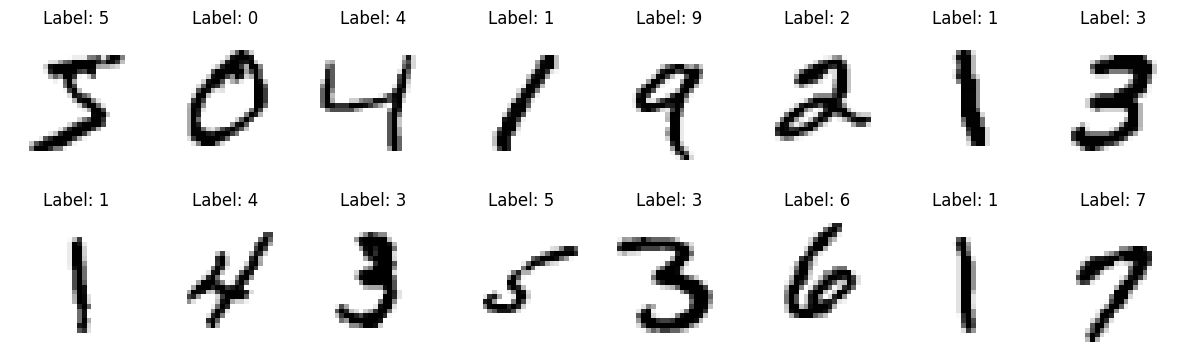

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Displaying a sample of the dataset

rows = 2
cols = 8
num_images = rows * cols

# Select the first few images and labels from the training set
sample_images = X_train[:num_images]
sample_labels = Y_train[:num_images]

fig, axes = plt.subplots(rows, cols, figsize=(1.5 * cols, 2 * rows))

for i, (image, label) in enumerate(zip(sample_images, sample_labels)):
    ax = axes[i // cols, i % cols]
    ax.imshow(image.reshape(28, 28), cmap='gray_r')
    
    # Retrieve the label, checking if it's in one-hot encoded format
    display_label = np.argmax(label) if label.ndim > 1 else label
    
    ax.set_title(f'Label: {display_label}')
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [21]:
# Reshape the input data (images) to be compatible with a CNN
X_train = X_train.reshape(-1, 28, 28, 1)  # 28x28 pixels, 1 channel (grayscale)
X_test = X_test.reshape(-1, 28, 28, 1)

# Apply one-hot encoding to the labels: Labels become vectors of length 10 (for a 10-class problem).
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Convert data to float and normalize to enhance model performance
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


In [22]:
# Data Augmentation
# Variables to control the transformations applied during data augmentation
# using Keras' ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the augmentation parameters
rotation_limit = 30
width_shift = 0.25
height_shift = 0.25
zoom_range_values = [0.5, 1.5]

# Initialize the ImageDataGenerator with the specified parameters
datagen = ImageDataGenerator(
    rotation_range=rotation_limit,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    zoom_range=zoom_range_values
)

# Apply the data augmentation to the training set
datagen.fit(X_train)


In [23]:
# Model Definition
model = tf.keras.models.Sequential([  # Sequential Model (layer by layer)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 32 convolutional filters with 3x3 kernel, ReLU activation
    tf.keras.layers.MaxPooling2D(2, 2),  # Max Pooling layer (2x2)

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # 64 convolutional filters with 3x3 kernel, ReLU activation
    tf.keras.layers.MaxPooling2D(2, 2),  # Max Pooling layer (2x2)

    tf.keras.layers.Dropout(0.5),  # Dropout (Randomly disables 50% of neurons to prevent overfitting)
                                   # This helps the model generalize better to unseen data.
    tf.keras.layers.Flatten(),  # Flattens the 2D output of the previous layers into a 1D vector
                                # This vector can be connected to fully connected (dense) layers.
    tf.keras.layers.Dense(100, activation='relu'),  # Fully connected layer with 100 neurons
    tf.keras.layers.Dense(10, activation="softmax")  # Output layer (10 neurons for classification)
])

# Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\benna\OneDrive\Desktop\Neural_network\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# This allows loading and processing only a small batch of the dataset at a time,
# conserving memory and potentially enhancing the model's performance
training_data_generator = datagen.flow(X_train, Y_train, batch_size=32)


In [25]:
BATCH_SIZE = 32

# Train the neural network. This may take some time...
print("Training model...")
epochs = 60

history = model.fit(
    training_data_generator,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, Y_test),
    steps_per_epoch=int(np.ceil(60000 / float(BATCH_SIZE))),
    validation_steps=int(np.ceil(10000 / float(BATCH_SIZE)))
)

print("Model training complete!")


Training model...
Epoch 1/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4496 - loss: 1.5749 - val_accuracy: 0.9521 - val_loss: 0.1801
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7614 - loss: 0.7445 - val_accuracy: 0.9669 - val_loss: 0.1171
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8094 - loss: 0.5858 - val_accuracy: 0.9713 - val_loss: 0.0958
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8306 - loss: 0.5321 - val_accuracy: 0.9732 - val_loss: 0.0867
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8402 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test set accuracy: 98.51%


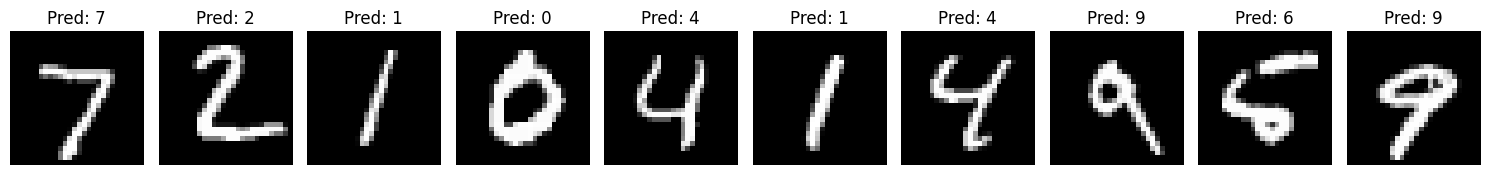

In [33]:


# Make predictions on the test dataset

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, Y_test, verbose=0)  # Y_test already one-hot encoded
print(f'Test set accuracy: {accuracy[1] * 100:.2f}%')

# Visualize some predictions
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: image.png
Predictions: [[1.0657049e-11 5.7078603e-10 2.0600964e-08 9.8994389e-11 9.9999368e-01
  1.0037364e-09 2.8116358e-09 6.3297498e-06 9.2424102e-10 1.6965090e-09]]
Predicted Label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: number1.png
Predictions: [[0.00647593 0.80086946 0.01408201 0.00752218 0.0220354  0.00699023
  0.03950721 0.07940137 0.00577553 0.01734074]]
Predicted Label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: number2.png
Predictions: [[1.4073714e-08 7.7964279e-13 9.9999952e-01 2.0423205e-10 3.5689751e-13
  4.8387481e-15 2.0143086e-13 4.2652638e-07 9.2893110e-11 1.4361006e-13]]
Predicted Label: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: number3.png
Predictions: [[3.6538833e-14 9.1590020e-11 1.7521078e-06 9.9999821e-01 7.2389706e-15
  2.6338270e-10 1.1309818e-17 1.3967769e-08 2.0822486e-11 2.4019090e-13]]
Predicted Label: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: number99.png
Predictions: [[7.1480644e-09 7.580

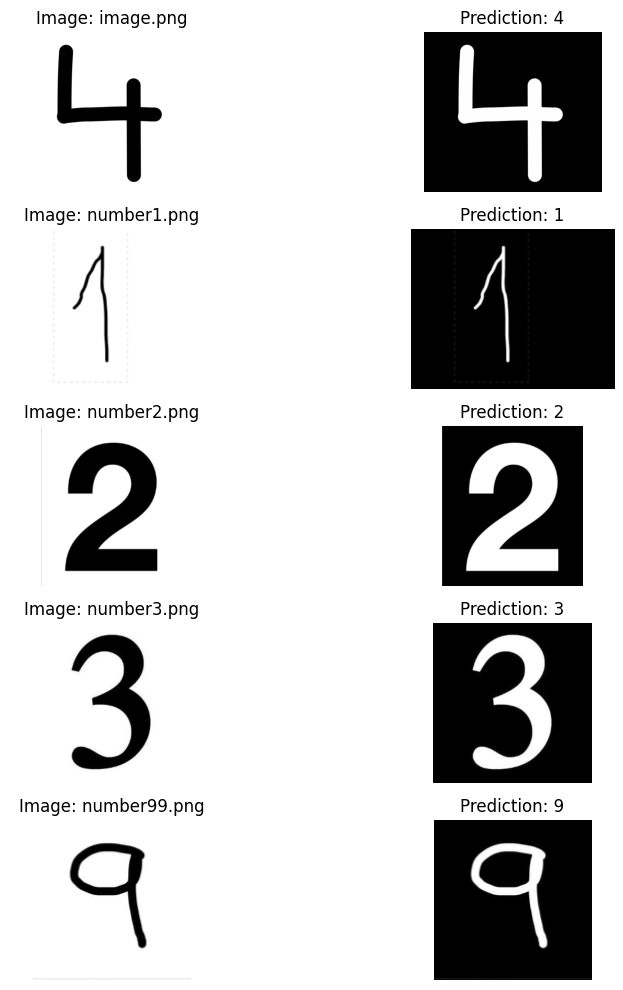

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import os

# MAKE PREDICTIONS FOR IMAGES THAT ARE NOT IN THE TEST FOLDER.
# For these, we convert the photos to grayscale, resize the images, and invert the colors to have white text on a black background.


# FUNCTION TO LOAD, PREPROCESS, AND INVERT COLORS OF AN IMAGE
def load_preprocess_invert_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize image to 28x28 pixels
    img_array = np.array(img) / 255.0  # Normalize pixel values between 0 and 1
    img_array = 1 - img_array  # Invert colors (white <-> black)
    img_array = np.expand_dims(img_array, axis=-1)  # Add dimension for channel (grayscale)
    img_array = np.expand_dims(img_array, axis=0)  # Add dimension for batch
    return img_array

# Directory path with images
image_directory = 'number/'

# List all files in the directory
image_names = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Create a figure to display results
fig, axes = plt.subplots(len(image_names), 2, figsize=(10, len(image_names) * 2))

# Iterate over each image in the directory
for i, image_name in enumerate(image_names):
    image_path = os.path.join(image_directory, image_name)
    
    # Preprocess and invert colors of the image
    preprocessed_image = load_preprocess_invert_image(image_path)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    predicted_label = np.argmax(predictions, axis=1)[0]
    
    # Print prediction details for debugging
    print(f'Image: {image_name}')
    print(f'Predictions: {predictions}')
    print(f'Predicted Label: {predicted_label}')
    
    # Display the original and inverted images, along with the prediction
    original_img = Image.open(image_path).convert('L')  # Convert to grayscale for display
    inverted_img = Image.fromarray((1 - np.array(original_img) / 255.0) * 255).convert('L')
    
    axes[i, 0].imshow(original_img, cmap='gray')
    axes[i, 0].set_title(f'Image: {image_name}')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(inverted_img, cmap='gray')
    axes[i, 1].set_title(f'Prediction: {predicted_label}')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()
